In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")

In [16]:
def shorten_number_dollar(num):
    suffixes = ['', 'K', 'M', 'B', 'T']
    order_of_magnitude = 0
    while abs(num) >= 1000 and order_of_magnitude < len(suffixes)-1:
        order_of_magnitude += 1
        num /= 1000.0
    if num == 0:
        return '$0'
    else: 
        return f'${num:.2f}{suffixes[order_of_magnitude]}'

In [4]:
print(df['Content_Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [28]:
df["Revenue"] = df["Installs"] * df["Price"]
revenue = df.groupby("Content_Rating")["Revenue"].sum().sort_values(ascending=False).reset_index()
revenue = revenue.set_index('Content_Rating')
revenue = revenue.reindex(index=['Unrated', 'Everyone', 'Everyone 10+', 'Teen', 'Mature 17+','Adults only 18+'])


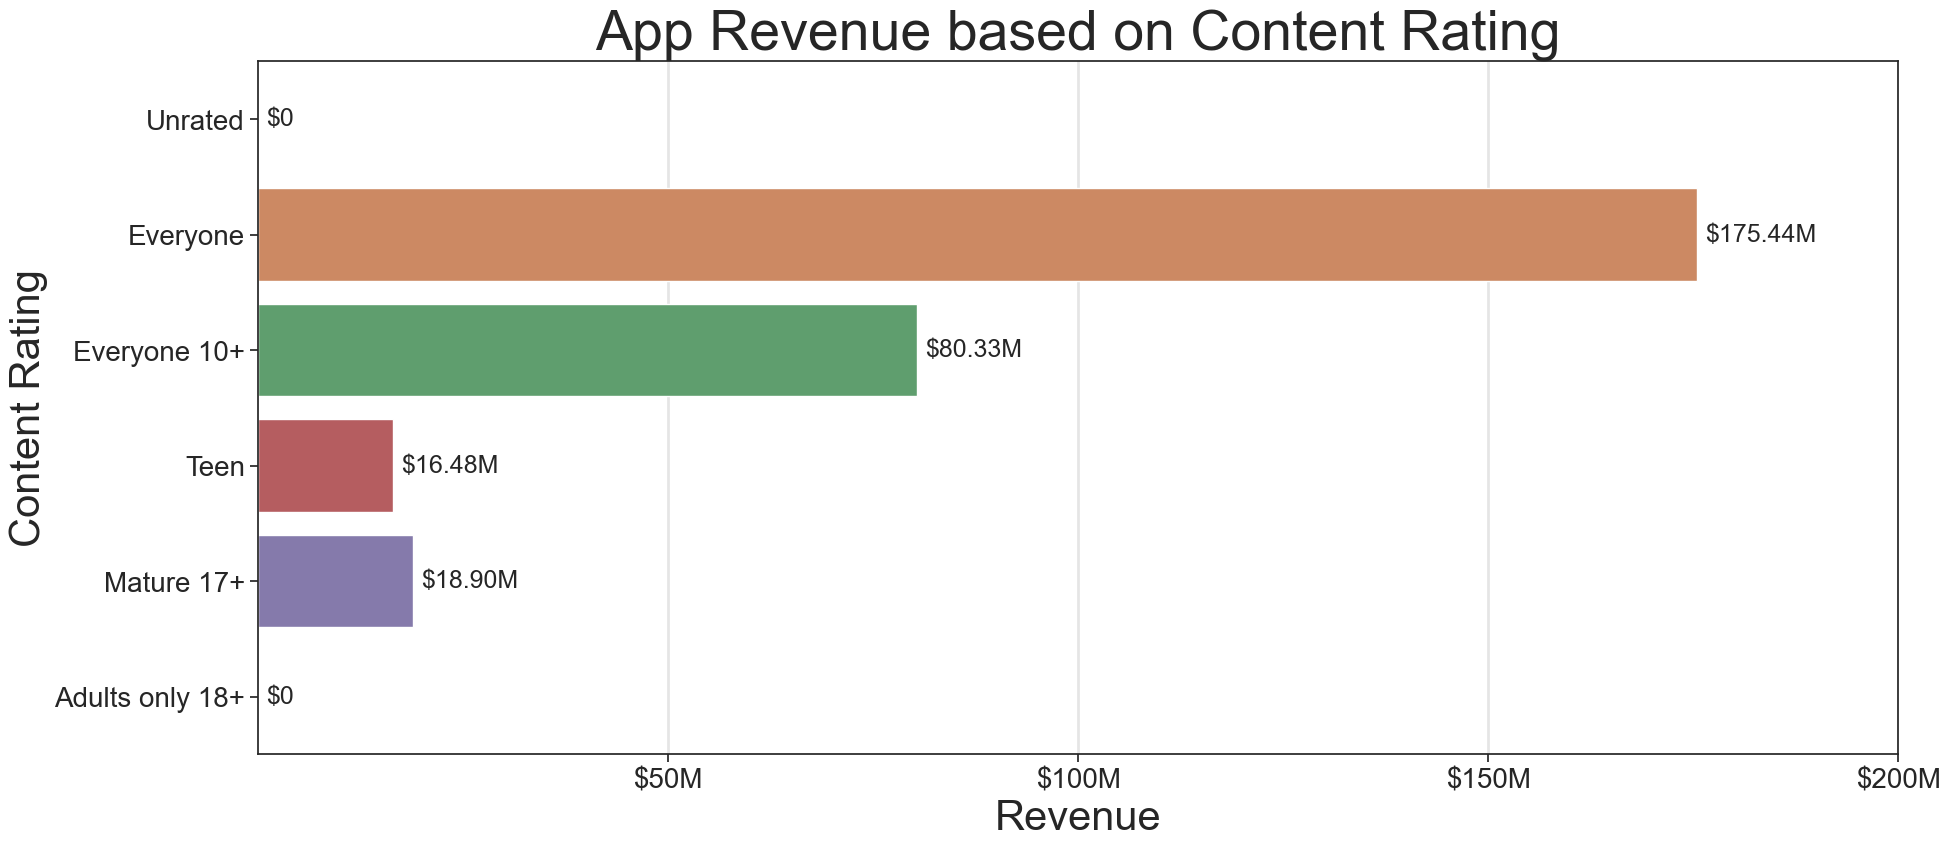

<Figure size 640x480 with 0 Axes>

In [84]:
sns.set_style("ticks")
plt.figure(figsize=(16,9))
plt.subplots_adjust(right=1.15)
sns.barplot(x="Revenue", y=revenue.index, data=revenue, orient='horizontal')
sns.set_context("talk", font_scale=1)
plt.title("App Revenue based on Content Rating", fontsize=40)
plt.ylabel("Content Rating", fontsize=30)
plt.xlabel("Revenue", fontsize=30)

xticks = [50000000, 100000000, 150000000, 200000000]
xticklabels = ['$50M','$100M','$150M','$200M']
plt.xticks(xticks, xticklabels, fontsize = 20)
plt.yticks(fontsize=20)

for i, val in enumerate(revenue["Revenue"].values):
   plt.annotate(shorten_number_dollar(val), xy=(val, i), xytext=(val+1000000, i), va='center')

plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='x')
plt.show()
plt.clf()

We can conclude that there is a big market share in the app space that has the widest age range. It's worth noting that apps rated 'Everyone' have the widest range of potential users.     

In [57]:
df_paid_only = df[df['Type'] == 'Paid']

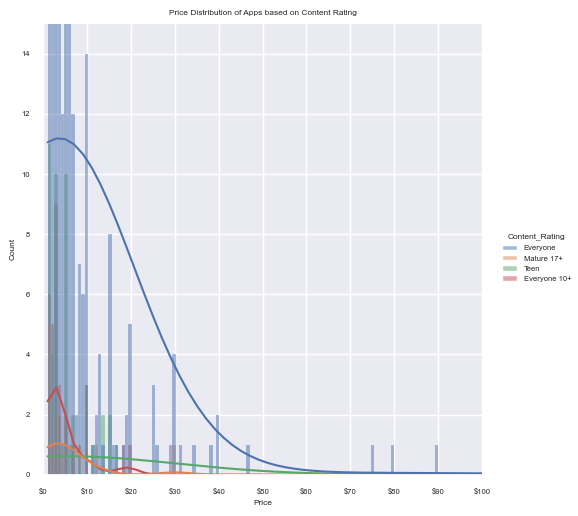

In [81]:
sns.displot(data=df_paid_only, x="Price", hue="Content_Rating", kde=True)
plt.axis([0, 100, 0, 15])
plt.title('Price Distribution of Apps based on Content Rating')
plt.xlabel('Price')
sns.set(font_scale=0.5)
xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
xticklabels = ['$0','$10','$20','$30','$40','$50','$60','$70','$80','$90','$100']
plt.xticks(xticks, xticklabels)
plt.show()

In [85]:
df_paid_only["Content_Rating"] = df_paid_only["Content_Rating"].replace({'Unrated': 0, 'Everyone': 1, 'Everyone 10+': 2, 'Teen': 3, 'Mature 17+': 4,'Adults only 18+': 5})

C:\Users\Dude\AppData\Local\Temp\ipykernel_18408\1085819306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid_only["Content_Rating"] = df_paid_only["Content_Rating"].replace({'Unrated': 0, 'Everyone': 1, 'Everyone 10+': 2, 'Teen': 3, 'Mature 17+': 4,'Adults only 18+': 5})


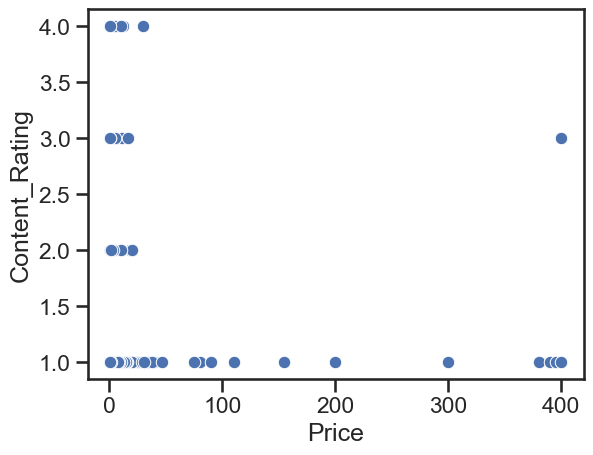

In [87]:
sns.scatterplot(data=df_paid_only, x="Price", y="Content_Rating")
plt.show()

Absolutely no correlation whatsoever